In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

In [2]:
[a, b], resolution = [0, 4], 200
points = [(1, 2), (2, 4), (3, 2)]

domain = np.linspace(a, b, resolution)

In [3]:
# This solution should always work, but to ensure this, we are recomputing
# np.prod(nums[idx_point+1:, idx_domain]) * np.prod(nums[idx_point+1:, idx_domain]) at
# each iteration of idx_point, which in reality is almost the same value all the time
#
# def getPolinomium(domain, points):
#     domain = domain.reshape(1, -1)
#     x = np.array([xx for (xx, yy) in points]).reshape(-1, 1)
#     y = np.array([yy for (xx, yy) in points])
#     nums = domain - x
#     dens = x - x.T
#     np.fill_diagonal(dens, 1)
#     dens = np.prod(dens, axis=1)
#     r = np.zeros(domain.size)
#     for idx_domain in range(domain.size):
#         for idx_point in range(x.size):
#             r[idx_domain] += y[idx_point] * np.prod(nums[:idx_point, idx_domain]) * np.prod(nums[idx_point+1:, idx_domain]) / dens[idx_point]
#     return r

# To be able to use this version, we must ensure that the points of the domain
# that we choose do not coincide with any of the x-values of the points that
# need to be crossed by our polynomium. This is beause nums[idx_point, idx_domain]
# would equal 0, and break the division, e.g. look what happens replacing if we 
# define --> points = [(1, 2), (2, 4), (4, 2)], where the x-value of the last point
# coincides with b.
# 
# def getPolinomium(domain, points):
#     domain = domain.reshape(1, -1)
#     x = np.array([xx for (xx, yy) in points]).reshape(-1, 1)
#     y = np.array([yy for (xx, yy) in points])
#     nums = domain - x
#     dens = x - x.T
#     np.fill_diagonal(dens, 1)
#     dens = np.prod(dens, axis=1)
#     r = np.zeros(domain.size)
#     print(dens)
#     print(nums)
#     for idx_domain in range(domain.size):
#         num_idx_domain = np.prod(nums[:, idx_domain])
#         for idx_point in range(x.size):
#             r[idx_domain] += y[idx_point] * (num_idx_domain / dens[idx_point]) / nums[idx_point, idx_domain]
#     return r

# As a last option, we can detect x-values present both in the points of the domain and
# in the set that need to be traversed, and directly assign the corresponding y-value of
# the point to be traversed. This solves the issue and avoids some computations, but since 
# we are forcing the value to be that, we are then not proving that the formula naturally converges
# to that value at that point. But well, the math already proved that the condition held, here we are
# more focusing on the practical side, seeing the concept in action, so I guess we can allow this. 
# 
def getPolinomium(domain, points):
    domain = domain.reshape(1, -1)
    x = np.array([xx for (xx, yy) in points]).reshape(-1, 1)
    y = np.array([yy for (xx, yy) in points])
    nums = domain - x
    dens = x - x.T
    np.fill_diagonal(dens, 1)
    dens = np.prod(dens, axis=1)
    r = np.zeros(domain.size)
    for idx_domain in range(domain.size):
        num_idx_domain = np.prod(nums[:, idx_domain])
        if not num_idx_domain:
            r[idx_domain] = y[np.where(x == domain[0, idx_domain])[0][0]]
        else:
            for idx_point in range(x.size):
                r[idx_domain] += y[idx_point] * (num_idx_domain / nums[idx_point, idx_domain] / dens[idx_point])
    return r


def getPolinomium(domain, points):
    domain = domain.reshape(1, -1)
    x, y = np.array(points).T  # Unpack points directly into x and y arrays
    x = x.reshape(-1, 1)

    nums = domain - x
    dens = x - x.T
    np.fill_diagonal(dens, 1)  # Avoid division by zero on diagonal
    dens = np.prod(dens, axis=1)

    r = np.zeros(domain.size)
    for idx_domain in range(domain.size):
        num_idx_domain = np.prod(nums[:, idx_domain])
        if num_idx_domain == 0:  # Handle case where domain matches a point in x
            r[idx_domain] = y[np.where(x == domain[0, idx_domain])[0][0]]
        else:
            r[idx_domain] = np.sum(y * num_idx_domain / nums[:, idx_domain] / dens)
    return r

def getPolinomium(domain, points):
    domain = domain.reshape(1, -1)
    x, y = np.array(points).T  # Unpack points into x and y
    x = x.reshape(-1, 1)

    nums = domain - x
    dens = x - x.T
    np.fill_diagonal(dens, 1)  # Avoid division by zero on diagonal
    dens = np.prod(dens, axis=1)

    num_prod = np.prod(nums, axis=0)  # Product of nums across rows for each domain point

    # Compute results for domain points with exact matches in x
    exact_matches = (domain == x).astype(float)
    exact_values = exact_matches.T @ y  # Transpose exact_matches for correct matrix multiplication

    # Compute Lagrange interpolation for all domain points
    with np.errstate(divide='ignore', invalid='ignore'):
        interpolation = np.sum(y[:, None] * num_prod / nums / dens[:, None], axis=0)

    # Combine interpolation and exact matches
    r = np.where(exact_matches.any(axis=0), exact_values, interpolation)
    return r

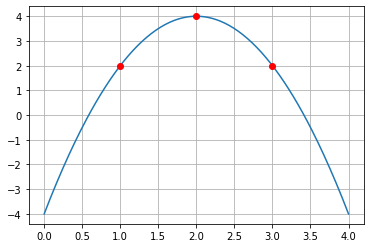

In [4]:
r = getPolinomium(domain, points)
fig, ax = plt.subplots()
ax.plot(domain, r)
ax.plot(*zip(*points), 'ro')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


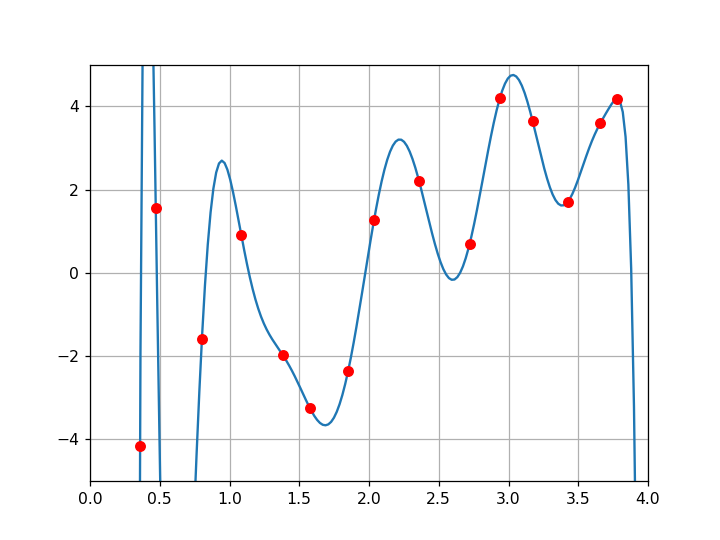

In [7]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.set_xlim([a, b])
ax.set_ylim([-5, 5])
plt.grid()

points = []

def update_plot(domain, points, r):  
    ax.clear()
    ax.plot(domain, r)
    ax.plot(*zip(*points), 'ro')
    ax.set_xlim([a, b])
    ax.set_ylim([-5, 5])
    plt.grid()
    
def onclick(event):
    print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          (event.button, event.x, event.y, event.xdata, event.ydata))
    points.append((event.xdata, event.ydata))
    r = getPolinomium(domain, points)
    update_plot(domain, points, r)
    fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

<IPython.core.display.Javascript object>


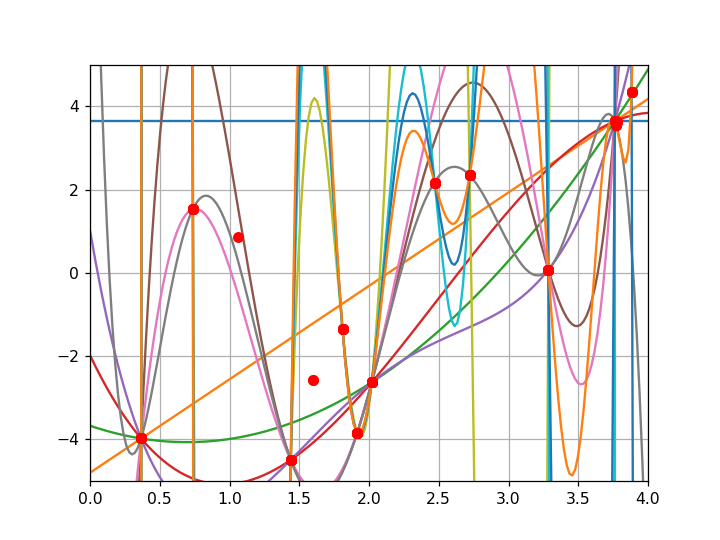

In [6]:
fig, ax = plt.subplots()
ax.set_xlim([a, b])
ax.set_ylim([-5, 5])
plt.grid()
points = []

def update_plot(domain, points, r):  
    ax.plot(domain, r)
    ax.plot(*zip(*points), 'ro')
    
def onclick(event):
    print('button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          (event.button, event.x, event.y, event.xdata, event.ydata))
    points.append((event.xdata, event.ydata))
    r = getPolinomium(domain, points)
    update_plot(domain, points, r)
    fig.canvas.draw()

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()